# Imports

In [1]:
import numpy as np
import os
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, Input
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import random

/Users/xic/Desktop/research/code/note/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Image collection

In [2]:
def collect_image_paths(directory):
    paths = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))
    return paths

path1 = collect_image_paths('./Data/Non Demented')
path2 = collect_image_paths('./Data/Mild Dementia')
path3 = collect_image_paths('./Data/Moderate Dementia')
path4 = collect_image_paths('./Data/Very mild Dementia')
size = 3000

random.seed(42)

sample_path1 = random.sample(path1, min(size, len(path1)))
sample_path2 = random.sample(path2, min(size, len(path2)))
sample_path3 = random.sample(path3, min(size, len(path3)))
sample_path4 = random.sample(path4, min(size, len(path4)))

print(f'Sampled {len(sample_path1)} paths from Non Demented')
print(f'Sampled {len(sample_path2)} paths from Mild Dementia')
print(f'Sampled {len(sample_path3)} paths from Moderate Dementia')
print(f'Sampled {len(sample_path4)} paths from Very mild Dementia')

Sampled 3000 paths from Non Demented
Sampled 3000 paths from Mild Dementia
Sampled 488 paths from Moderate Dementia
Sampled 3000 paths from Very mild Dementia


# Encoding the data

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1], [2], [3]])

OneHotEncoder()

# Image Preprocessing

In [4]:
data = []
result = []
for path in sample_path1:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray()[0])
        
for path in sample_path2:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()[0]) 
        
for path in sample_path3:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray()[0])
        
for path in sample_path4:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray()[0])

In [5]:
data = np.array(data)
data.shape

(9488, 128, 128, 3)

In [6]:
result = np.array(result)
result.shape

(9488, 4)

# Dataset Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.3, random_state=42)
print(y_test.shape)

(2847, 4)


# Model Compilation

In [8]:
# Define the CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

None


# Model Training

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 35s 164ms/step - accuracy: 0.3745 - loss: 15.8279 - val_accuracy: 0.5887 - val_loss: 0.8913
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 36s 175ms/step - accuracy: 0.6110 - loss: 0.8666 - val_accuracy: 0.7418 - val_loss: 0.5870
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 37s 178ms/step - accuracy: 0.7386 - loss: 0.6116 - val_accuracy: 0.8303 - val_loss: 0.3990
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 37s 179ms/step - accuracy: 0.8182 - loss: 0.4312 - val_accuracy: 0.8813 - val_loss: 0.3068
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 37s 180ms/step - accuracy: 0.8592 - loss: 0.3440 - val_accuracy: 0.9066 - val_loss: 0.2499
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 37s 179ms/step - accuracy: 0.8846 - loss: 0.2808 - val_accuracy: 0.9298 - val_loss: 0.2140
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 37s 180ms/step - accuracy: 0.9057 - loss: 0.2460 - val_accuracy: 0.9319 - val_loss: 0.1864
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 37s 180ms/step - accuracy: 0.9203 - loss: 

# Data Visualization

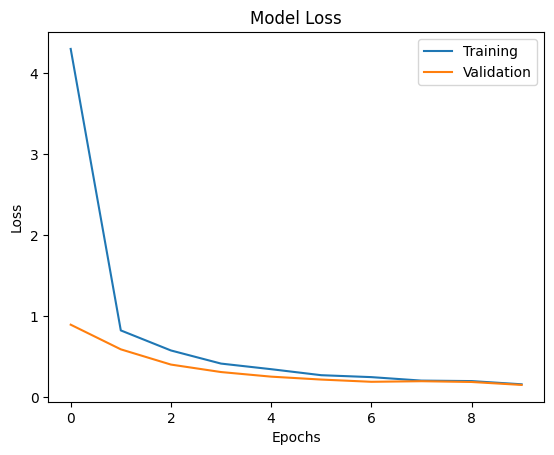

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

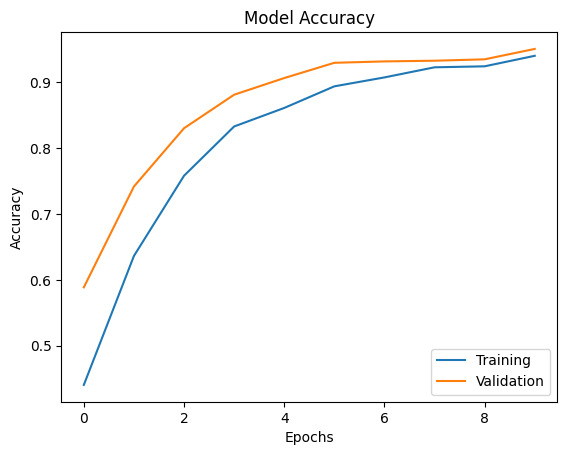

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [12]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

if len(y_test.shape) > 1 and y_test.shape[1] > 1:  
    y_test = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       903
           1       0.97      0.99      0.98       885
           2       1.00      1.00      1.00       158
           3       0.93      0.94      0.93       901

    accuracy                           0.95      2847
   macro avg       0.96      0.96      0.96      2847
weighted avg       0.95      0.95      0.95      2847



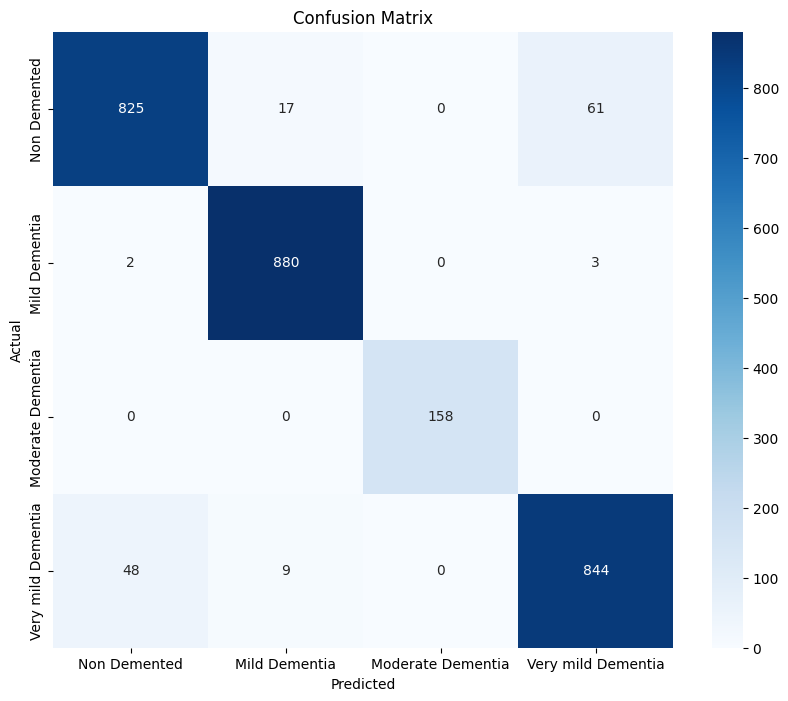

In [13]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very mild Dementia'],
            yticklabels=['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very mild Dementia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Exporting Model

In [14]:
model.save('Alzheimer_Detector.keras')